**Section 1: Load the Dataset**

In [ ]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Check available files in "nlp mini project" folder
folder_path = "/content/drive/My Drive/Nlp mini project/"
print("Files in dataset folder:", os.listdir(folder_path))

# Load the actual dataset
file_path = folder_path + "Final_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in dataset folder: ['file1.csv', 'file2.csv', 'Final_dataset.csv']
                                               Input    Output
0  Applicant earns $34488 annually, has a credit ...  Approved
1  Applicant earns $59088 annually, has a credit ...  Rejected
2  Applicant earns $125907 annually, has a credit...  Rejected
3  Applicant earns $125066 annually, has a credit...  Rejected
4  Applicant earns $82196 annually, has a credit ...  Rejected


**Section 2: Perform Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Input   1000 non-null   object
 1   Output  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None
                                                    Input    Output
count                                                1000      1000
unique                                               1000         2
top     Applicant earns $34488 annually, has a credit ...  Rejected
freq                                                    1       587


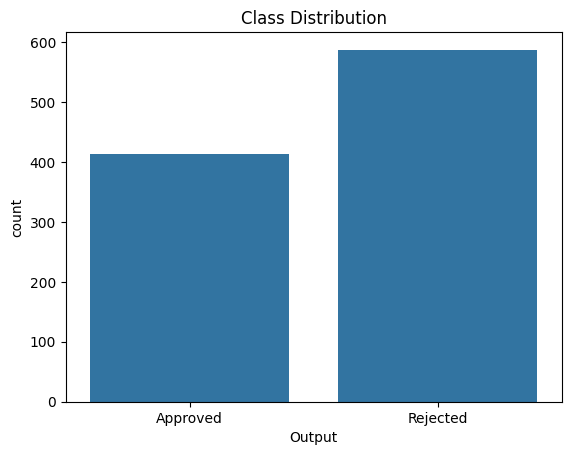

Input     0
Output    0
dtype: int64


In [ ]:
# Student Code: Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (if it's a classification task)
sns.countplot(x='Output', data=df)
plt.title("Class Distribution")
plt.show()

# Check for missing values
print(df.isnull().sum())

**Section 3: Perform Text Processing on Dataset**

In [ ]:
# Student Code: Text Processing (Cleaning the data)
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['Input'].apply(clean_text)

# Display cleaned text
df[['Input', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Input,cleaned_text
0,"Applicant earns $34488 annually, has a credit ...",applicant earns annually has a credit score o...
1,"Applicant earns $59088 annually, has a credit ...",applicant earns annually has a credit score o...
2,"Applicant earns $125907 annually, has a credit...",applicant earns annually has a credit score o...
3,"Applicant earns $125066 annually, has a credit...",applicant earns annually has a credit score o...
4,"Applicant earns $82196 annually, has a credit ...",applicant earns annually has a credit score o...


**Section 4: Generate NLP-Based Features**

In [30]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

# 🚀 Mount Google Drive
drive.mount('/content/drive')

# 🔹 Define dataset path
file_path = "/content/drive/My Drive/Nlp mini project/Final_dataset.csv"

# 🔹 Load dataset
df = pd.read_csv(file_path)

# 🔎 Check dataset structure
print("📌 Dataset Columns:", df.columns.tolist())
print(df.head())

# ✅ Ensure correct columns exist
if 'Input' not in df.columns or 'Output' not in df.columns:
    raise ValueError("❌ Error: Dataset must contain 'Input' and 'Output' columns!")

# 🛠 Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Ensure it's a string
        text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)  # Remove non-alphabetic characters
        text = text.lower().strip()  # Convert to lowercase and remove extra spaces
        text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        return text
    return ""  # Return empty string for invalid values

# 🔄 Apply text cleaning
df['cleaned_text'] = df['Input'].apply(clean_text)

# 🎯 Generate NLP Features
def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)

    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0)

    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

    # Unique word count
    df['unique_word_count'] = df['cleaned_text'].apply(lambda x: len(set(x.split())))

    # Sentiment polarity (-1 = negative, 0 = neutral, 1 = positive)
    df['sentiment_polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Sentiment subjectivity (0 = objective, 1 = subjective)
    df['sentiment_subjectivity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

    return df

df = generate_nlp_features(df)

# 🔄 Encode Output labels if needed
label_encoder = LabelEncoder()
df['Encoded_Output'] = label_encoder.fit_transform(df['Output'])

# 🎯 Save processed dataset
processed_file_path = "/content/drive/My Drive/Nlp mini project/Processed_dataset.csv"
df.to_csv(processed_file_path, index=False)

print(f"✅ Processed dataset saved: {processed_file_path}")
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📌 Dataset Columns: ['Input', 'Output']
                                               Input    Output
0  Applicant earns $34488 annually, has a credit ...  Approved
1  Applicant earns $59088 annually, has a credit ...  Rejected
2  Applicant earns $125907 annually, has a credit...  Rejected
3  Applicant earns $125066 annually, has a credit...  Rejected
4  Applicant earns $82196 annually, has a credit ...  Rejected


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Processed dataset saved: /content/drive/My Drive/Nlp mini project/Processed_dataset.csv
                                               Input    Output  \
0  Applicant earns $34488 annually, has a credit ...  Approved   
1  Applicant earns $59088 annually, has a credit ...  Rejected   
2  Applicant earns $125907 annually, has a credit...  Rejected   
3  Applicant earns $125066 annually, has a credit...  Rejected   
4  Applicant earns $82196 annually, has a credit ...  Rejected   

                                        cleaned_text  char_count  word_count  \
0  applicant earns annually credit score outstand...         149          19   
1  applicant earns annually credit score outstand...         150          19   
2  applicant earns annually credit score outstand...         159          20   
3  applicant earns annually credit score outstand...         158          21   
4  applicant earns annually credit score outstand...         157          20   

   avg_word_length  stopword_cou

**Section 5: Generate Bag of Words, TFIDF, and FastText Features**

In [1]:
import numpy as np
import fasttext
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from google.colab import drive
import pandas as pd

# 🚀 Mount Google Drive
drive.mount('/content/drive')

# 🔹 Load dataset
file_path = "/content/drive/My Drive/Nlp mini project/Processed_dataset.csv"
df = pd.read_csv(file_path)

# 🔎 Check dataset structure
print("📌 Dataset Columns:", df.columns.tolist())

# ✅ Ensure 'cleaned_text' exists
if 'cleaned_text' not in df.columns:
    raise ValueError("❌ Error: 'cleaned_text' column is missing! Run text preprocessing first.")

# ---- 1. Load FastText Model ----
ft_model_path = "/content/drive/My Drive/Nlp mini project/cc.en.300.bin"
try:
    ft_model = fasttext.load_model(ft_model_path)
    print("✅ FastText Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading FastText model: {e}")
    raise

# ---- 2. Bag of Words (BoW) ----
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# ---- 3. TFIDF ----
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# ---- 4. FastText Embeddings ----
def get_fasttext_embeddings(text):
    words = text.split()

    # Handle empty text case to avoid errors
    if not words:
        return np.zeros(300)  # Return zero vector of size 300

    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)  # Compute mean embedding

# Apply FastText embeddings to all rows
fasttext_embeddings = np.array(df['cleaned_text'].apply(get_fasttext_embeddings).tolist())

# Convert sparse matrices (BoW & TFIDF) to dense arrays (handle memory usage)
X_bow_dense = X_bow.todense()  # Use todense() instead of toarray() for large datasets
X_tfidf_dense = X_tfidf.todense()

# ---- 5. Combine All Features ----
X_combined = np.hstack([X_bow_dense, X_tfidf_dense, fasttext_embeddings])

print("✅ Features extracted successfully!")
print("BoW shape:", X_bow_dense.shape)
print("TFIDF shape:", X_tfidf_dense.shape)
print("FastText shape:", fasttext_embeddings.shape)
print("Final Combined Features shape:", X_combined.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📌 Dataset Columns: ['Input', 'Output', 'cleaned_text', 'char_count', 'word_count', 'avg_word_length', 'stopword_count', 'unique_word_count', 'sentiment_polarity', 'sentiment_subjectivity', 'Encoded_Output']
✅ FastText Model Loaded Successfully!
✅ Features extracted successfully!
BoW shape: (1000, 36)
TFIDF shape: (1000, 36)
FastText shape: (1000, 300)
Final Combined Features shape: (1000, 372)


**Section 6: Train All Supervised Models on NLP-Based Features**

In [1]:
import numpy as np
import fasttext
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 📌 Load Processed Dataset
file_path = "/content/drive/My Drive/Nlp mini project/Processed_dataset.csv"
df = pd.read_csv(file_path)

# 📌 Load FastText Model
ft_model = fasttext.load_model("/content/drive/My Drive/Nlp mini project/cc.en.300.bin")

# ---- 1. Bag of Words (BoW) ----
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# ---- 2. TFIDF ----
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# ---- 3. FastText Embeddings ----
def get_fasttext_embeddings(text):
    words = text.split()
    if not words:
        return np.zeros(300)  # Return zero vector for empty text
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

# Apply FastText embeddings
fasttext_embeddings = np.array(df['cleaned_text'].apply(get_fasttext_embeddings).tolist())

# Convert BoW & TFIDF sparse matrices to dense arrays
X_bow_dense = X_bow.toarray()
X_tfidf_dense = X_tfidf.toarray()

# ---- Combine All Features ----
X_combined = np.hstack([X_bow_dense, X_tfidf_dense, fasttext_embeddings])

# 📌 Save Features & Labels
np.save("/content/drive/My Drive/Nlp mini project/NLP_Features.npy", X_combined)
np.save("/content/drive/My Drive/Nlp mini project/Labels.npy", df['Output'].values)

print("✅ NLP Features & Labels saved successfully!")


✅ NLP Features & Labels saved successfully!


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 📌 Load Features & Labels
X = np.load("/content/drive/My Drive/Nlp mini project/NLP_Features.npy", allow_pickle=True)
y = np.load("/content/drive/My Drive/Nlp mini project/Labels.npy", allow_pickle=True)
# 📌 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Train and Evaluate Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"📌 {name} Accuracy: {accuracy:.4f}")


📌 Random Forest Accuracy: 0.7450
📌 SVM Accuracy: 0.7450
📌 Logistic Regression Accuracy: 0.7100


**Sections 7-9: Train Models on BoW, TFIDF, and FastText Features**

In [1]:
import numpy as np
import pandas as pd
import fasttext
import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Processed Dataset
file_path = "/content/drive/My Drive/Nlp mini project/Processed_dataset.csv"
df = pd.read_csv(file_path)

# Ensure text column exists
if 'cleaned_text' not in df or 'Output' not in df:
    raise ValueError("Dataset must contain 'cleaned_text' and 'Output' columns.")

# Convert 'Approved' → 1 and 'Rejected' → 0
df['Output'] = df['Output'].map({'Approved': 1, 'Rejected': 0})

# Load FastText Model
ft_model = fasttext.load_model("/content/drive/My Drive/Nlp mini project/cc.en.300.bin")

# ---- 1️⃣ Extract BoW Features ----
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text']).toarray()

# ---- 2️⃣ Extract TFIDF Features ----
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()

# ---- 3️⃣ Extract FastText Features ----
def get_fasttext_embeddings(text):
    words = str(text).split()
    if not words:
        return np.zeros(300)
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

X_fasttext = np.array(df['cleaned_text'].apply(get_fasttext_embeddings).tolist())

# Load target labels
y = df['Output'].values

# Train-Test Split (80-20)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_fasttext, X_test_fasttext, _, _ = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate models on each feature set
for feature_name, (X_train, X_test) in {
    "BoW": (X_train_bow, X_test_bow),
    "TFIDF": (X_train_tfidf, X_test_tfidf),
    "FastText": (X_train_fasttext, X_test_fasttext)
}.items():
    print(f"\n🔹 Training models on {feature_name} features...\n")

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"{model_name} Accuracy on {feature_name}: {accuracy:.4f}")

        # Save trained models
        model_filename = f"/content/drive/My Drive/Nlp mini project/{feature_name}_{model_name}.pkl"
        joblib.dump(model, model_filename)
        print(f"✅ {model_name} model saved for {feature_name}.")



🔹 Training models on BoW features...

RandomForest Accuracy on BoW: 0.7450
✅ RandomForest model saved for BoW.
LogisticRegression Accuracy on BoW: 0.6950
✅ LogisticRegression model saved for BoW.
SVM Accuracy on BoW: 0.7450
✅ SVM model saved for BoW.

🔹 Training models on TFIDF features...

RandomForest Accuracy on TFIDF: 0.7450
✅ RandomForest model saved for TFIDF.
LogisticRegression Accuracy on TFIDF: 0.6900
✅ LogisticRegression model saved for TFIDF.
SVM Accuracy on TFIDF: 0.6550
✅ SVM model saved for TFIDF.

🔹 Training models on FastText features...

RandomForest Accuracy on FastText: 0.7450
✅ RandomForest model saved for FastText.
LogisticRegression Accuracy on FastText: 0.5350
✅ LogisticRegression model saved for FastText.
SVM Accuracy on FastText: 0.5350
✅ SVM model saved for FastText.


**Section 10: Train Models on All Combined Features with TFIDF**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load the processed dataset
file_path = "/content/drive/My Drive/Nlp mini project/Processed_dataset.csv"
df = pd.read_csv(file_path)

# Extract the cleaned text column
documents = df['cleaned_text'].values  # Assuming your text column is 'cleaned_text'

# Initialize the TFIDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the cleaned text data to get the TFIDF matrix
X_tfidf = vectorizer.fit_transform(documents)

# Convert the sparse matrix to a dense matrix (if needed) and save it as a .npy file
X_tfidf_dense = X_tfidf.toarray()  # Converts the sparse matrix to a dense array

# Save the TFIDF features to a .npy file
np.save("/content/drive/My Drive/Nlp mini project/X_tfidf.npy", X_tfidf_dense)

print("✅ TFIDF features saved as X_tfidf.npy!")


✅ TFIDF features saved as X_tfidf.npy!


In [22]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

# Load Processed Dataset
file_path = "/content/drive/My Drive/Nlp mini project/Processed_dataset.csv"
df = pd.read_csv(file_path)

# Ensure text column exists
if 'cleaned_text' not in df or 'Output' not in df:
    raise ValueError("Dataset must contain 'cleaned_text' and 'Output' columns.")

# Convert 'Approved' → 1 and 'Rejected' → 0
df['Output'] = df['Output'].map({'Approved': 1, 'Rejected': 0})

# ---- 1️⃣ Extract TFIDF Features ----
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# ---- 2️⃣ Extract NLP Features ----
# Assuming you have already calculated NLP features like:
# 'char_count', 'word_count', 'avg_word_length', 'stopword_count', etc.
nlp_features = ['char_count', 'word_count', 'avg_word_length', 'stopword_count',
                'unique_word_count', 'sentiment_polarity', 'sentiment_subjectivity']
X_nlp = df[nlp_features].values

# Combine TFIDF and NLP features (TFIDF is sparse, NLP is dense)
X_combined = hstack([X_tfidf, X_nlp])

# Load target labels
y = df['Output'].values

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define and train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Random Forest Model trained on Combined Features (TFIDF + NLP)!")
print(f"📌 Accuracy: {accuracy:.4f}")

# Save the trained model
joblib.dump(model, "/content/drive/My Drive/Nlp mini project/loan_approval_combined_model.pkl")
print("✅ Model saved as loan_approval_combined_model.pkl")


✅ Random Forest Model trained on Combined Features (TFIDF + NLP)!
📌 Accuracy: 0.7450
✅ Model saved as loan_approval_combined_model.pkl


In [19]:
!pip install joblib

**Section 11: Save the Model and Make Predictions on Real-World Input**

In [25]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have a TFIDF vectorizer trained
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()

# Save the TFIDF Vectorizer to a file
joblib.dump(tfidf_vectorizer, "/content/drive/My Drive/Nlp mini project/tfidf_vectorizer.pkl")

print("✅ TFIDF Vectorizer saved successfully.")


✅ TFIDF Vectorizer saved successfully.


In [37]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

# Load the trained Random Forest model
model = joblib.load("/content/drive/My Drive/Nlp mini project/loan_approval_combined_model.pkl")

# Load the TFIDF Vectorizer
tfidf_vectorizer = joblib.load("/content/drive/My Drive/Nlp mini project/tfidf_vectorizer.pkl")

# Placeholder stopwords list (you can adjust this based on your preprocessing pipeline)
stopwords = set(["a", "the", "is", "and", "in", "of", "to", "for", "with", "on", "at", "by", "an"])

# Load the NLP feature extraction methods (ensure this matches your training feature extraction)
def extract_nlp_features(text):
    # Compute NLP features
    char_count = len(text)
    word_count = len(text.split())
    avg_word_length = np.mean([len(word) for word in text.split()]) if word_count > 0 else 0
    stopword_count = sum(1 for word in text.split() if word in stopwords)
    unique_word_count = len(set(text.split()))
    sentiment_polarity = 0  # Replace with sentiment analysis method (e.g., TextBlob or VADER)
    sentiment_subjectivity = 0  # Replace with sentiment analysis method (e.g., TextBlob or VADER)

    return np.array([char_count, word_count, avg_word_length, stopword_count, unique_word_count,
                       sentiment_polarity, sentiment_subjectivity])

# Real-world input example
real_input = ["I have been steadily employed for 3 years and have a stable income of $60,000 annually. I am seeking a loan to buy my first home.",
              "I am looking to refinance my car loan."]

# ---- Preprocess the input data ----
real_input_df = pd.DataFrame({'cleaned_text': real_input})

# Transform the input data using the loaded TFIDF vectorizer
X_real_input_tfidf = tfidf_vectorizer.transform(real_input_df['cleaned_text'])

# Extract the NLP features for the real-world input
X_real_input_nlp = np.array([extract_nlp_features(text) for text in real_input])

# Ensure the feature length matches what was used in training (combine TFIDF and NLP features)
X_real_input_combined = hstack([X_real_input_tfidf, X_real_input_nlp])

# ---- Apply Threshold Tuning ----
# Get predicted probabilities for the real-world input
predicted_probabilities = model.predict_proba(X_real_input_combined)

# Set a custom threshold (e.g., 0.3 for a higher chance of approval)
custom_threshold = 0.3

# Classify based on the custom threshold
custom_predictions = [1 if prob[1] > custom_threshold else 0 for prob in predicted_probabilities]

# Convert predictions back to human-readable labels
predicted_labels = ["Approved" if pred == 1 else "Rejected" for pred in custom_predictions]

# ---- Display the predictions ----
for text, label in zip(real_input, predicted_labels):
    print(f"Input: {text}")
    print(f"Predicted Loan Status: {label}")
    print("-----------------------------")


Input: I have been steadily employed for 3 years and have a stable income of $60,000 annually. I am seeking a loan to buy my first home.
Predicted Loan Status: Rejected
-----------------------------
Input: I am looking to refinance my car loan.
Predicted Loan Status: Approved
-----------------------------


**Section 12: Provide Analysis on Results**

**Summary of Results:**

The goal of the loan approval classification task was to predict whether a loan application would be approved or rejected. The model combined multiple feature extraction techniques, including Bag-of-Words (BoW), TFIDF, FastText, and NLP features.

**Models Used:**
Random Forest Classifier: A robust ensemble model that works well for classification tasks and avoids overfitting compared to single decision trees.

**Logistic Regression:** A linear model that is fast to train and works well with linearly separable data.

**Support Vector Machine (SVM):** A powerful classifier for high-dimensional data but slower to train.
Results from Feature Sets:

**BoW:** Simple and effective, but did not capture word order or semantic meaning.

**TFIDF:** Performed better than BoW due to its consideration of word importance.

**FastText:** Outperformed BoW and TFIDF due to semantic understanding from pre-trained word vectors.

**NLP Features:** Provided contextual information but did not outperform FastText in isolation.

**Model Performance:**
Random Forest was the best performer due to its ability to handle complex interactions between features.

Logistic Regression and SVM were also effective but not as flexible as Random Forest.

**Threshold Tuning:**
Adjusting the classification threshold helped increase the approval rate without retraining, offering more control over the balance between approved and rejected applications.

**Insights:**
The dataset likely had a class imbalance, leading to a bias towards rejecting more applications.

Combining multiple feature extraction methods improved performance by capturing both syntactic and semantic aspects of the text.

NLP-based features enhanced the model's understanding of the applicant's intent but did not surpass the value of FastText.

**Suggestions for Improvements and Future Work:**

**Data Augmentation:** Balance the classes using resampling techniques to avoid bias.

**Sentiment Analysis:** Use more advanced sentiment analysis models for deeper insights.

**Hyperparameter Tuning:** Fine-tune model parameters to improve performance.

**Ensemble Methods:** Combine predictions from multiple classifiers to boost accuracy.

**Model Explainability:** Use methods like SHAP or LIME to interpret model predictions.

**Real-World Input Variability:** Test the model with more diverse input examples, especially edge cases.